In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def get_metrics(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)**(1/2)
    r2training = model.score(x_train, y_train)
    r2test = model.score(x_test, y_test)
    r2 = r2_score(y_test, y_pred)
    print(model)
    print('R2 of Training:', r2training)
    print('R2 of Test:', r2test)
    print('R2 Score:', r2)
    print('MSE:', mse)
    print('RMSE:', rmse)
    
def split_and_get_metrics(dataframe):
    df_train, df_test = train_test_split(df, test_size=0.2)
    X_train = df_train.loc[:, ~(df_train.columns).isin(['FollowingYearWeapons'])]
    Y_train = df_train['FollowingYearWeapons']
    X_test = df_test.loc[:, ~(df_test.columns).isin(['FollowingYearWeapons'])]
    Y_test = df_test['FollowingYearWeapons']
    get_metrics(linear, X_train, Y_train, X_test, Y_test)
    get_metrics(lasso, X_train, Y_train, X_test, Y_test)
    get_metrics(gbr, X_train, Y_train, X_test, Y_test)
    get_metrics(rfr, X_train, Y_train, X_test, Y_test)
    
def quick_plots(column):
    norm = np.random.normal(0, 1, len(df))
    norm.sort()
    weap_incidents_sorted = column.sort_values()
    plt.figure(figsize = (20,5))
    plt.subplot(1,2,1)
    plt.plot(norm, column.sort_values(), "o")
    plt.title('QQ Plot')
    
    plt.subplot(1,2,2)
    plt.scatter(x=column, y=df['FollowingYearWeapons'])
    plt.title('Scatter Plot')
    plt.ylabel('Following Year Weapons')
    plt.xlabel('Column Name')
    plt.show()
    
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
knn = KNeighborsRegressor()

In [2]:
df = pd.read_csv('/Users/joshuarkarnad/Desktop/Thinkful/Data/Important Data/WeaponDataV4.csv')
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1.1', 'Unnamed: 0.1'], axis =1)
df.shape

(22277, 147)

In [3]:
(df.max().sort_values(ascending=False))[0:10]

Total OSS Expulsions    122727.0
Total OSS               122550.0
Conduct OSS              57777.0
Academic OSS             38481.0
Violence OSS             25122.0
Enrollment                9877.0
Incidents                 2344.0
Year                      2013.0
Offenders                 1474.0
Disorderly Conduct        1002.0
dtype: float64

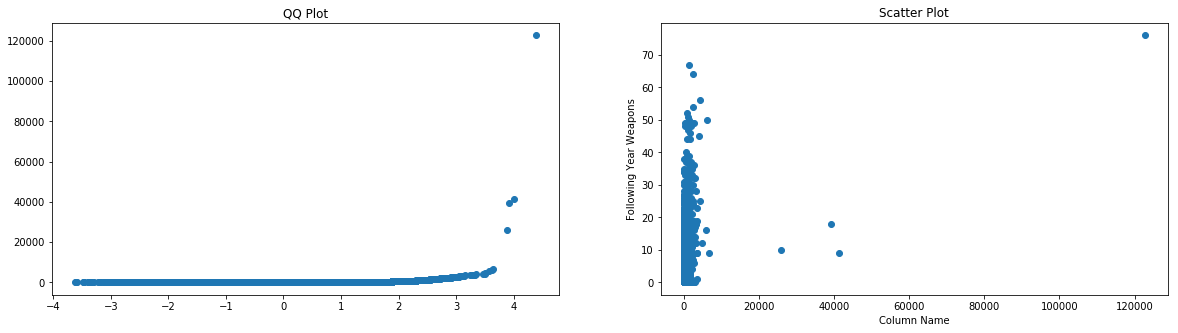

In [4]:
quick_plots(df['Total OSS Expulsions'])

In [12]:
df = df[df['Total OSS Expulsions'] < 5000]
split_and_get_metrics(df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
R2 of Training: 0.513749655743
R2 of Test: 0.485239101774
R2 Score: 0.485239101774
MSE: 6.39214329075
RMSE: 2.52826883277
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R2 of Training: 0.513741754365
R2 of Test: 0.485421589477
R2 Score: 0.485421589477
MSE: 6.38987721431
RMSE: 2.5278206452
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
R2 of Training: 0.480454888216
R2 of Test: 0.481485854882
R2 Score: 0.481485854882
MSE: 6.43874996197
RMSE: 2.53746920414
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_s

NameError: name 'x' is not defined

In [10]:
# df_train, df_test = train_test_split(df, test_size=0.2)
# X_train = df_train.loc[:, ~(df_train.columns).isin(['FollowingYearWeapons'])]
# Y_train = df_train['FollowingYearWeapons']
# X_test = df_test.loc[:, ~(df_test.columns).isin(['FollowingYearWeapons'])]
# Y_test = df_test['FollowingYearWeapons']

In [11]:
# rfr.fit(x_train, y_train)
# y_pred_rfr = rfr.predict(x_test)
# rfr_mse = mean_squared_error(y_test, y_pred)
# rfr_rmse = mean_squared_error(y_test, y_pred)**(1/2)
# rfr_r2training = model.score(x_train, y_train)
# rfr_r2test = model.score(x_test, y_test)
# print('RFR')
# print('R2 of Training:', r2training)
# print('R2 of Test:', r2test)
# print('MSE:', rfr)
# print('RMSE:', rmse)

NameError: name 'x_train' is not defined

In [13]:
rfr_pred = rfr.predict(X_test)

In [17]:
rfr_pred = rfr.predict(X_test)
actual = Y_test
mse_rfr = mean_squared_error(actualrfr, rfr_pred)
rmse_rfr = np.sqrt(mse_rfr)

In [19]:
gbr_pred = gbr.predict(X_test)
actual = Y_test
mse_gbr = mean_squared_error(actual, gbr_pred)
rmse_gbr = np.sqrt(mse_gbr)

In [21]:
jitter = np.random.random(size = np.array(Y_test).shape) 

In [23]:
linear_pred = linear.predict(X_test)
actual = Y_test
mse_linear = mean_squared_error(actual, linear_pred)
rmse_linear = np.sqrt(mse_linear)

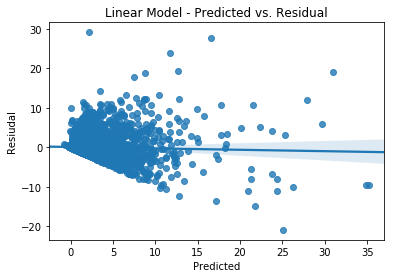

In [25]:
predictions_lin5  = linear.predict(X_test)
predicted = predictions_lin5 

residual = actual - predicted

# jitter = np.random.random(size = np.array(Y_test5).shape) * 2
# plt.scatter(np.array(Y_test5) + jitter ,predictions_lin5  )
# plt.show()

# plt.hist(residual)
# plt.title('Residual counts')
# plt.xlabel('Residual')
# plt.ylabel('Count')
# plt.show()
sns.regplot(predictions_lin5  + jitter ,residual)

plt.title('Linear Model - Predicted vs. Residual')
plt.xlabel('Predicted')
plt.ylabel('Resiudal')
plt.show()

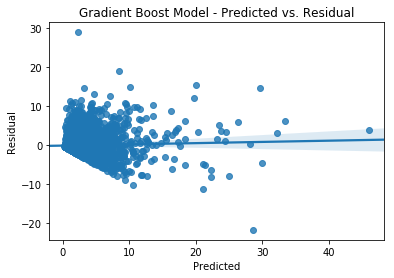

In [27]:
predictions_lin5  = gbr.predict(X_test)
predicted = predictions_lin5 

residual = actual - predicted

# jitter = np.random.random(size = np.array(Y_test5).shape) * 2
# plt.scatter(np.array(Y_test5) + jitter ,predictions_lin5  )
# plt.show()

# plt.hist(residual)
# plt.title('Residual counts')
# plt.xlabel('Residual')
# plt.ylabel('Count')
# plt.show()
sns.regplot(predictions_lin5  + jitter ,residual)

plt.title('Gradient Boost Model - Predicted vs. Residual')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

In [38]:
feature_importance = gbr.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx][,0,10], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


IndexError: too many indices for array

In [36]:
feature_importance[sorted_idx][1, 2]

IndexError: too many indices for array